In [2]:
import torch
from matplotlib import pyplot as plt 

In [3]:
root_path = "/home/yigit/Desktop/comp_wta_cnp/"
suffix = '1680165074'  # TODO: get all the suffixes from the folder
tl_code, ve_code = 'training_loss_', 'validation_error_'
cnp_tl_path, cnp_ve_path = f'{root_path}cnp_{tl_code}{suffix}.pt', f'{root_path}cnp_{ve_code}{suffix}.pt'
wta_tl_path, wta_ve_path = f'{root_path}wta_{tl_code}{suffix}.pt', f'{root_path}wta_{ve_code}{suffix}.pt'

In [4]:
cnp_tl, cnp_ve = torch.load(cnp_tl_path), torch.load(cnp_ve_path)
wta_tl, wta_ve = torch.load(wta_tl_path), torch.load(wta_ve_path)

tl_size, ve_size = min(cnp_tl.shape[0], wta_tl.shape[0]), min(cnp_ve.shape[0], wta_ve.shape[0])

cnp_tl, cnp_ve = cnp_tl[:tl_size], cnp_ve[:ve_size]
wta_tl, wta_ve = wta_tl[:tl_size], wta_ve[:ve_size]

In [5]:
cnp_tl_mean, cnp_ve_mean = cnp_tl.mean(dim=0), cnp_ve.mean(dim=0)
cnp_tl_std, cnp_ve_std = cnp_tl.std(dim=0), cnp_ve.std(dim=0)
wta_tl_mean, wta_ve_mean = wta_tl.mean(dim=0), wta_ve.mean(dim=0)
wta_tl_std, wta_ve_std = wta_tl.std(dim=0), wta_ve.std(dim=0)

<Figure size 576x432 with 0 Axes>

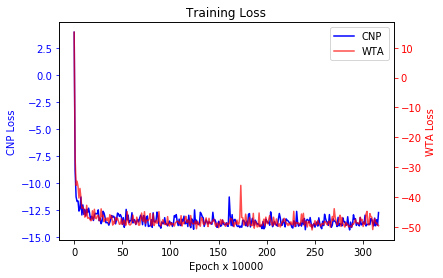

In [6]:
step=10000
idx = torch.arange(start=0, end=tl_size, step=step)

x = torch.arange(idx.shape[0])
y1 = cnp_tl[idx]
y2 = wta_tl[idx]

plt.figure(figsize=(8, 6))

fig, ax1 = plt.subplots()
ax1.title.set_text('Training Loss')

ax1.plot(x, y1, 'b-', label='CNP')
ax1.set_xlabel(f'Epoch x {step}')
ax1.set_ylabel('CNP Loss', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-', label='WTA', alpha=0.7)
ax2.set_ylabel('WTA Loss', color='r')
ax2.tick_params('y', colors='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

# Display the plot
plt.show()


# plt.subplot(1, 2, 1)
# plt.plot(, cnp_tl[idx], '-', label='CNP')
# # plt.plot(wta_tl)
# plt.xlabel(f'Epoch x {step}')
# plt.ylabel('Loss')
# plt.title('CNP Training Loss')

# plt.subplot(1, 2, 2)
# plt.plot(torch.arange(idx.shape[0]), wta_tl[idx], '-', label='WTA')
# # plt.plot(wta_tl)
# plt.xlabel(f'Epoch x {step}')
# plt.ylabel('Loss')
# plt.title('WTA Training Loss')

# plt.tight_layout()
# plt.show()


<Figure size 576x432 with 0 Axes>

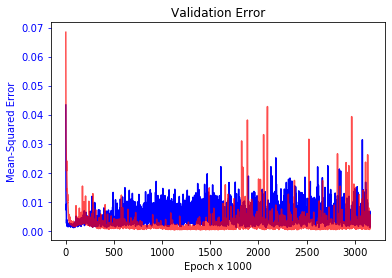

In [9]:
step=1
idx = torch.arange(start=1, end=ve_size, step=step)

x = torch.arange(idx.shape[0])
y1 = cnp_ve[idx]
y2 = wta_ve[idx]

plt.figure(figsize=(8, 6))

fig, ax1 = plt.subplots()
ax1.title.set_text('Validation Error')

ax1.plot(x, y1, 'b-', label='CNP')
ax1.plot(x, y2, 'r-', label='WTA', alpha=0.7)
ax1.set_xlabel(f'Epoch x 1000')
ax1.set_ylabel('Mean-Squared Error', color='b')
ax1.tick_params('y', colors='b')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()

# Display the plot
plt.show()